In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
df = pd.read_csv("train.csv")
print("数据基本信息：")
df.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7093 entries, 0 to 7092
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  7093 non-null   int64  
 1   CGPA                       7093 non-null   float64
 2   Internships                7093 non-null   int64  
 3   Projects                   7093 non-null   int64  
 4   Workshops/Certifications   7093 non-null   int64  
 5   AptitudeTestScore          7093 non-null   int64  
 6   SoftSkillsRating           7093 non-null   float64
 7   ExtracurricularActivities  7093 non-null   object 
 8   PlacementTraining          7093 non-null   object 
 9   SSC_Marks                  7093 non-null   int64  
 10  HSC_Marks                  7093 non-null   int64  
 11  label                      7093 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 665.1+ KB


# 1. EDA

In [3]:
print("前五行数据：")
df.head()

前五行数据：


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,label
0,1,7.5,1,1,1,65,4.4,No,No,61,79,0
1,2,7.3,1,2,2,82,4.8,Yes,No,79,80,0
2,3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,1
3,4,7.0,0,2,2,71,4.2,Yes,No,55,66,0
4,5,7.7,1,1,1,76,4.0,No,No,62,65,0


In [4]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,label
count,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000
mean,3547.000000,7.692415,1.037925,2.025941,1.006767,79.371916,4.326223,69.053292,74.433808,0.413929
std,2047.717062,0.639624,0.665057,0.866532,0.904310,8.177674,0.410144,10.424113,8.926584,0.492571
min,1.000000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000,0.000000
25%,1774.000000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,58.000000,67.000000,0.000000
50%,3547.000000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000,0.000000
75%,5320.000000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000,1.000000
max,7093.000000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000,1.000000


In [5]:
# 检查 StudentID 是否唯一
is_unique = df['StudentID'].is_unique

# 输出结果
print("StudentID 是否唯一:", is_unique)
if not is_unique:
    print("存在重复的 StudentID，数量:", df['StudentID'].duplicated().sum())

StudentID 是否唯一: True


In [6]:
print("缺失值检查：")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

缺失值检查：
Series([], dtype: int64)


In [7]:
numeric_stats = df.describe().transpose()
numeric_stats = numeric_stats[['min', 'max', 'mean', '50%', 'std']]
numeric_stats.rename(columns={'50%': 'median'}, inplace=True)

# 检查整数型特征的唯一值（适用于离散特征如 Projects, Internships）
discrete_features = ['Internships', 'Projects', 'Workshops/Certifications', 
                    'AptitudeTestScore', 'ExtracurricularActivities', 
                    'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'label']
discrete_stats = pd.DataFrame()
for feat in discrete_features:
    unique_vals = np.sort(df[feat].unique())
    discrete_stats.loc[feat, 'unique_values'] = str(unique_vals[:5]) + '...' if len(unique_vals) > 5 else str(unique_vals)
    discrete_stats.loc[feat, 'n_unique'] = len(unique_vals)

# 合并结果
stats_summary = pd.concat([numeric_stats, discrete_stats], axis=1)
print("各特征的数值范围及统计描述：")
display(stats_summary)

各特征的数值范围及统计描述：


,min,max,mean,median,std,unique_values,n_unique
StudentID,1.0,7093.0,3547.000000,3547.0,2047.717062,NaN,NaN
CGPA,6.5,9.1,7.692415,7.7,0.639624,NaN,NaN
Internships,0.0,2.0,1.037925,1.0,0.665057,[0 1 2],3.0
Projects,0.0,3.0,2.025941,2.0,0.866532,[0 1 2 3],4.0
Workshops/Certifications,0.0,3.0,1.006767,1.0,0.904310,[0 1 2 3],4.0
AptitudeTestScore,60.0,90.0,79.371916,80.0,8.177674,[60 61 62 63 64]...,31.0
SoftSkillsRating,3.0,4.8,4.326223,4.4,0.410144,NaN,NaN
SSC_Marks,55.0,90.0,69.053292,70.0,10.424113,[55 56 57 58 59]...,36.0
HSC_Marks,57.0,88.0,74.433808,73.0,8.926584,[57 58 59 60 61]...,32.0
label,0.0,1.0,0.413929,0.0,0.492571,[0 1],2.0


In [8]:
# 将文字属性转换为0/1数值属性
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PlacementTraining'] = df['PlacementTraining'].apply(lambda x: 1 if x == 'Yes' else 0)
df[['ExtracurricularActivities', 'PlacementTraining']].head()

,ExtracurricularActivities,PlacementTraining
0,0,0
1,1,0
2,1,1
3,1,0
4,0,0


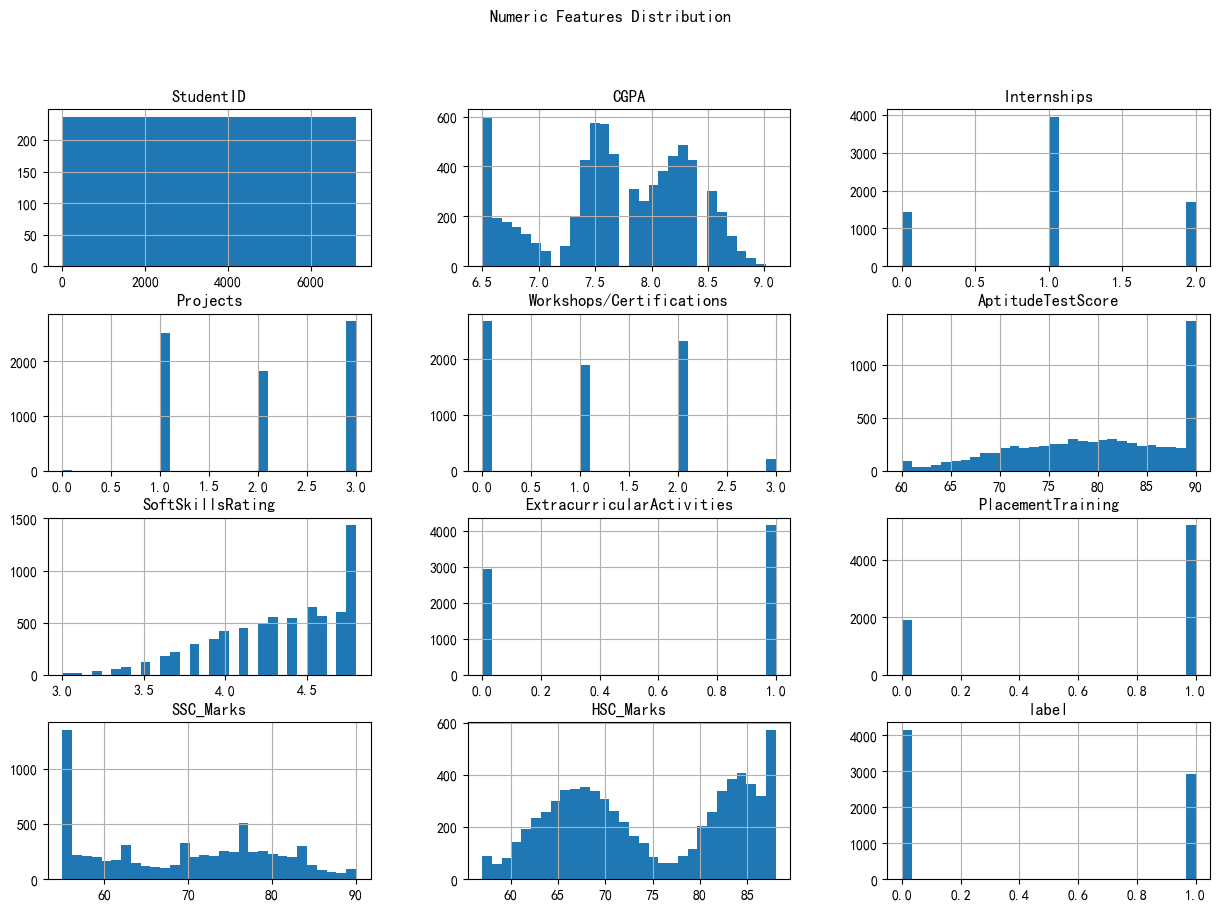

In [9]:
# 分别查看数值型特征的分布
numeric_columns = df.select_dtypes(include=[np.number]).columns
# 画出数值型特征的分布图
df[numeric_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle("Numeric Features Distribution")
plt.show()

注意上述分布，以及类别平衡问题

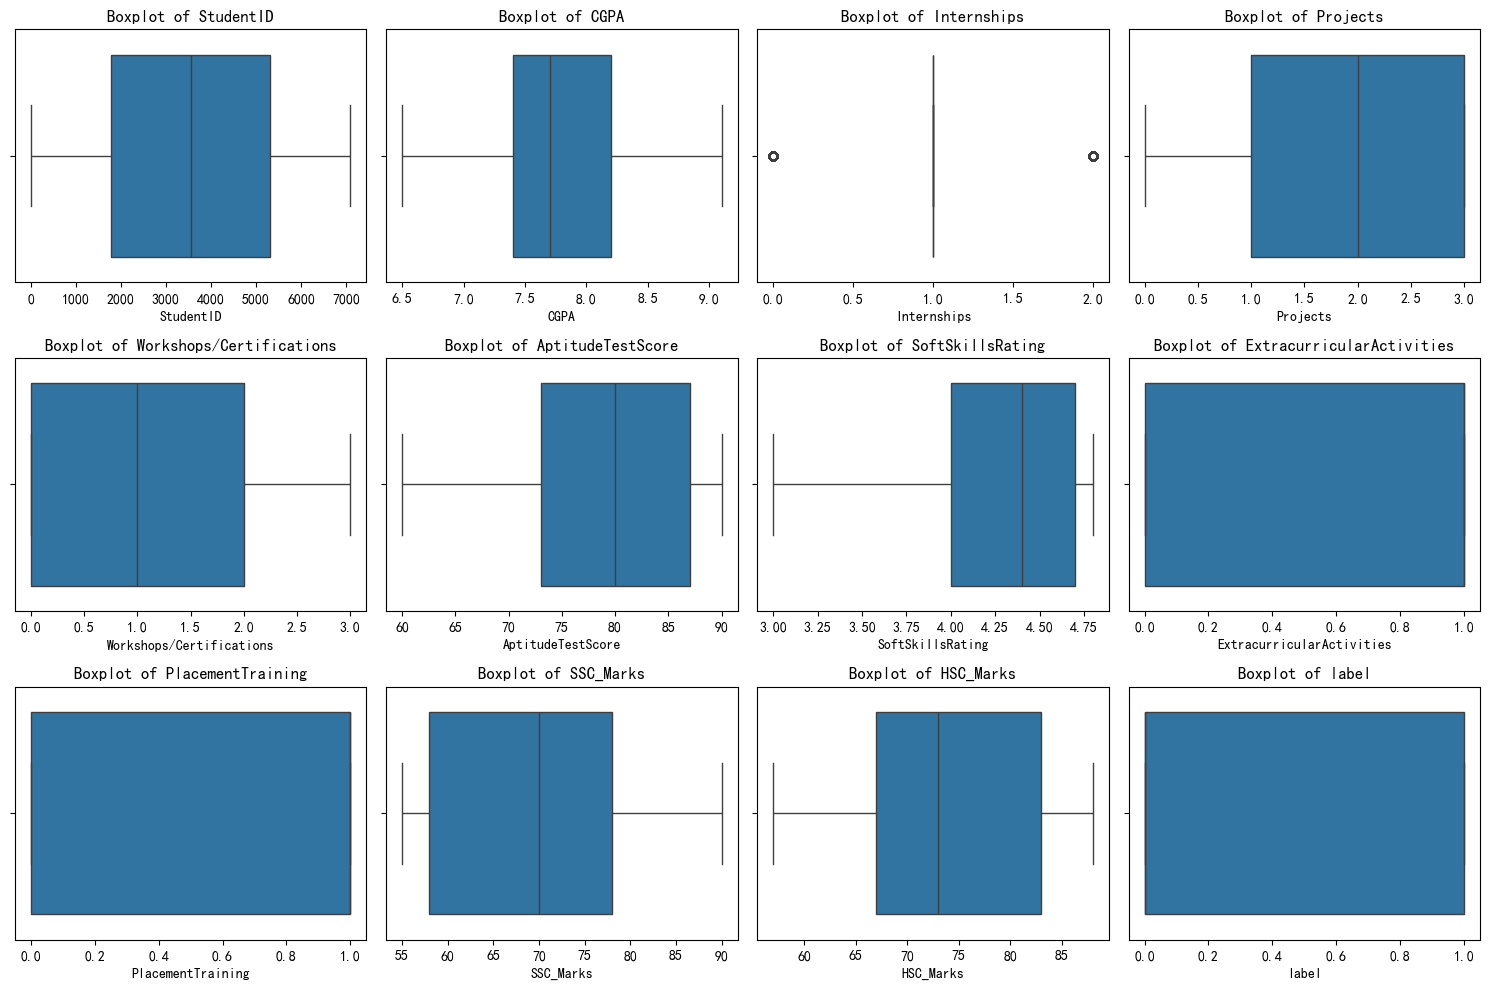

In [10]:
# 检查异常值（使用箱线图）
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

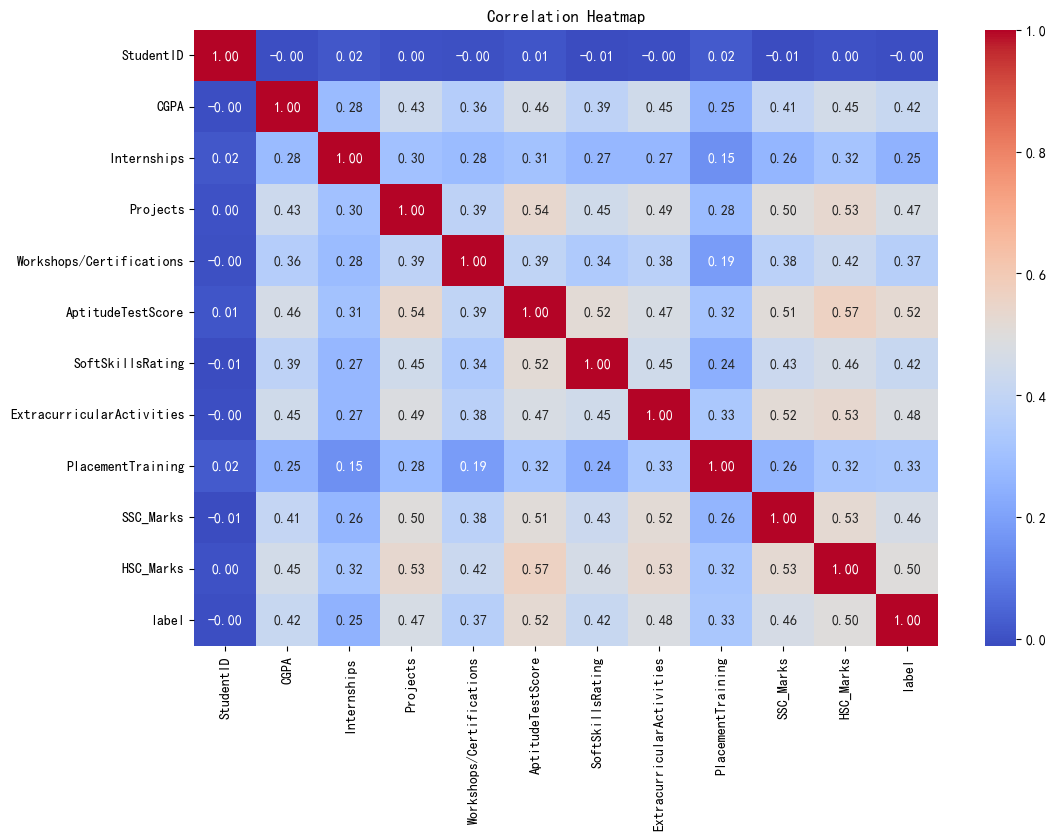

In [11]:
# 查看各特征与目标变量的相关性
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

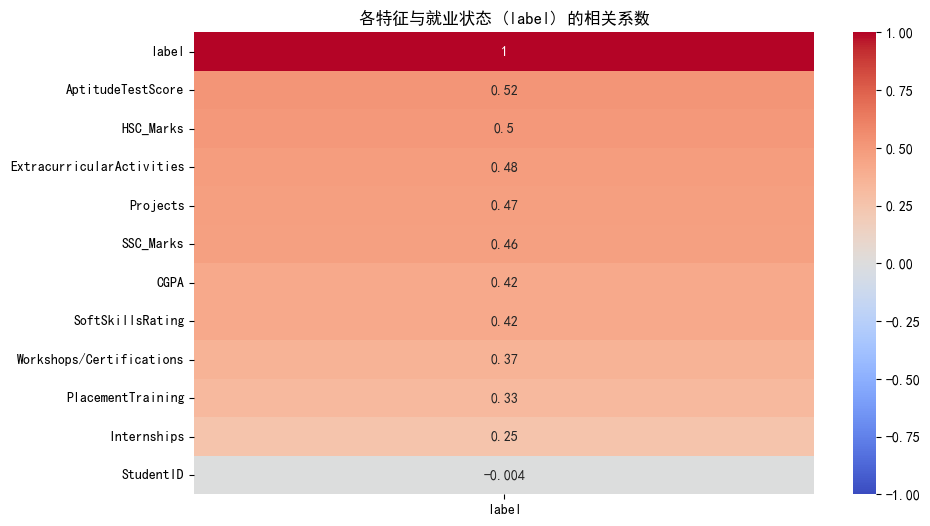

In [12]:
# 计算相关系数并绘图
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['label']].sort_values(by='label', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("各特征与就业状态 (label) 的相关系数")
plt.show()

C:\Users\Ray\AppData\Local\Temp\ipykernel_6276\229323543.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PlacementTraining', y='label', data=df, ci=None)


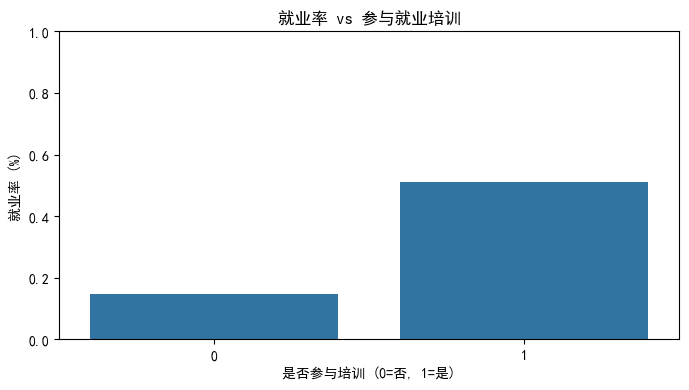

In [13]:
# 分类特征就业率对比
plt.figure(figsize=(8, 4))
sns.barplot(x='PlacementTraining', y='label', data=df, ci=None)
plt.title("就业率 vs 参与就业培训")
plt.xlabel("是否参与培训 (0=否, 1=是)")
plt.ylabel("就业率 (%)")
plt.ylim(0, 1)
plt.show()

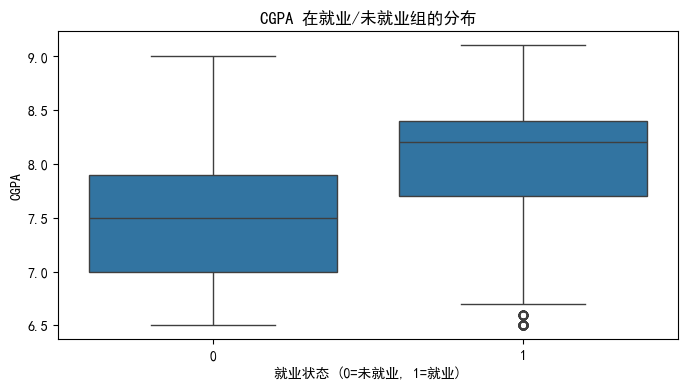

In [14]:
# 就业vs未就业在连续特征的分布
plt.figure(figsize=(8, 4))
sns.boxplot(x='label', y='CGPA', data=df)
plt.title("CGPA 在就业/未就业组的分布")
plt.xlabel("就业状态 (0=未就业, 1=就业)")
plt.ylabel("CGPA")
plt.show()

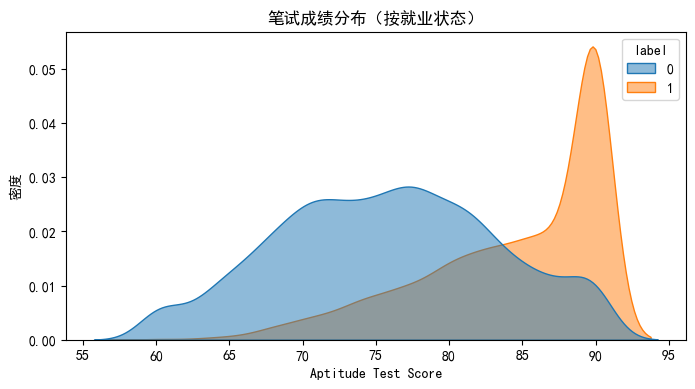

In [15]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='AptitudeTestScore', hue='label', fill=True, alpha=0.5)
plt.title("笔试成绩分布（按就业状态）")
plt.xlabel("Aptitude Test Score")
plt.ylabel("密度")
plt.show()

# 2. Data Processing

根据步骤1中的结果，无需处理空值和异常值

In [16]:
# 删除StudentID列
df.drop('StudentID', axis=1, inplace=True)
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,label
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,7.3,1,2,2,82,4.8,1,0,79,80,0
2,7.5,1,1,2,85,4.4,1,1,81,80,1
3,7.0,0,2,2,71,4.2,1,0,55,66,0
4,7.7,1,1,1,76,4.0,0,0,62,65,0


In [17]:
# 独热编码
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ['Internships', 'Projects', 'Workshops/Certifications']

def one_hot_encode_sklearn(df, cols):
    """
    使用sklearn的OneHotEncoder进行独热编码
    参数:
        df: 原始DataFrame
        cols: 需要编码的列名列表
    返回:
        编码后的DataFrame和编码器对象（用于后续数据）
    """
    # 创建编码器
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    # 应用编码
    encoded_data = encoder.fit_transform(df[cols])
    
    # 创建新列名
    feature_names = []
    for i, col in enumerate(cols):
        categories = encoder.categories_[i]
        feature_names.extend([f"{col}_{cat}" for cat in categories])
    
    # 构建编码后的DataFrame
    df_encoded = pd.concat([
        df.drop(cols, axis=1),
        pd.DataFrame(encoded_data, columns=feature_names)
    ], axis=1)
    
    return df_encoded, encoder

df_sklearn_encoded, encoder = one_hot_encode_sklearn(df, onehot_cols)
print("\n独热编码结果示例:")
print(df_sklearn_encoded.filter(regex='Internships_|Projects_|Workshops/Certifications_').head())


独热编码结果示例:
   Internships_0  Internships_1  Internships_2  Projects_0  Projects_1  \
0            0.0            1.0            0.0         0.0         1.0   
1            0.0            1.0            0.0         0.0         0.0   
2            0.0            1.0            0.0         0.0         1.0   
3            1.0            0.0            0.0         0.0         0.0   
4            0.0            1.0            0.0         0.0         1.0   

   Projects_2  Projects_3  Workshops/Certifications_0  \
0         0.0         0.0                         0.0   
1         1.0         0.0                         0.0   
2         0.0         0.0                         0.0   
3         1.0         0.0                         0.0   
4         0.0         0.0                         0.0   

   Workshops/Certifications_1  Workshops/Certifications_2  \
0                         1.0                         0.0   
1                         0.0                         1.0   
2                 

In [19]:
df_sklearn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7093 entries, 0 to 7092
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CGPA                        7093 non-null   float64
 1   AptitudeTestScore           7093 non-null   int64  
 2   SoftSkillsRating            7093 non-null   float64
 3   ExtracurricularActivities   7093 non-null   int64  
 4   PlacementTraining           7093 non-null   int64  
 5   SSC_Marks                   7093 non-null   int64  
 6   HSC_Marks                   7093 non-null   int64  
 7   label                       7093 non-null   int64  
 8   Internships_0               7093 non-null   float64
 9   Internships_1               7093 non-null   float64
 10  Internships_2               7093 non-null   float64
 11  Projects_0                  7093 non-null   float64
 12  Projects_1                  7093 non-null   float64
 13  Projects_2                  7093 

### 其他特征构造

In [21]:
df_sklearn_encoded.to_csv('train_new.csv', index=False)
# df.to_csv('train_new.csv', index=False)

# 3. Modeling
考虑项：
- 高偏度特征分布变换
- 是否需要处理类别不平衡
- 添加组合特征，删除低贡献特征
- 扩展参数网格
- 改用LightGBM
- 分析预测错误的样本后针对性改进？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # 过采样处理类别不平衡
from imblearn.pipeline import Pipeline  # 将过采样和模型结合为统一流程
from scipy.stats import loguniform, randint, uniform
from joblib import load, dump
import os

### ML + GridSearch:

训练集类别比例:
 label
0    0.586071
1    0.413929
Name: proportion, dtype: float64

=== 正在训练 Logistic Regression ===
Fitting 5 folds for each of 16 candidates, totalling 80 fits
模型已保存为: saved_models/Logistic_Regression.joblib
最佳参数: {'model__C': 0.3, 'model__class_weight': None}
平均Macro-F1: 0.7914

特征贡献度:

特征重要性：
                   Feature  Importance
         AptitudeTestScore    0.568621
         PlacementTraining    0.482473
 ExtracurricularActivities    0.336496
                 SSC_Marks    0.261494
          SoftSkillsRating    0.241943
                 HSC_Marks    0.241729
                      CGPA    0.228489
Workshops/Certifications_2    0.181247
Workshops/Certifications_1    0.169913
                Projects_3    0.126306
                Projects_1    0.089911
                Projects_0    0.075336
             Internships_1    0.059416
             Internships_0    0.057573
                Projects_2    0.050989
Workshops/Certifications_3    0.039079
             Internships_2   

C:\Users\Ray\AppData\Local\Temp\ipykernel_17384\801344045.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')


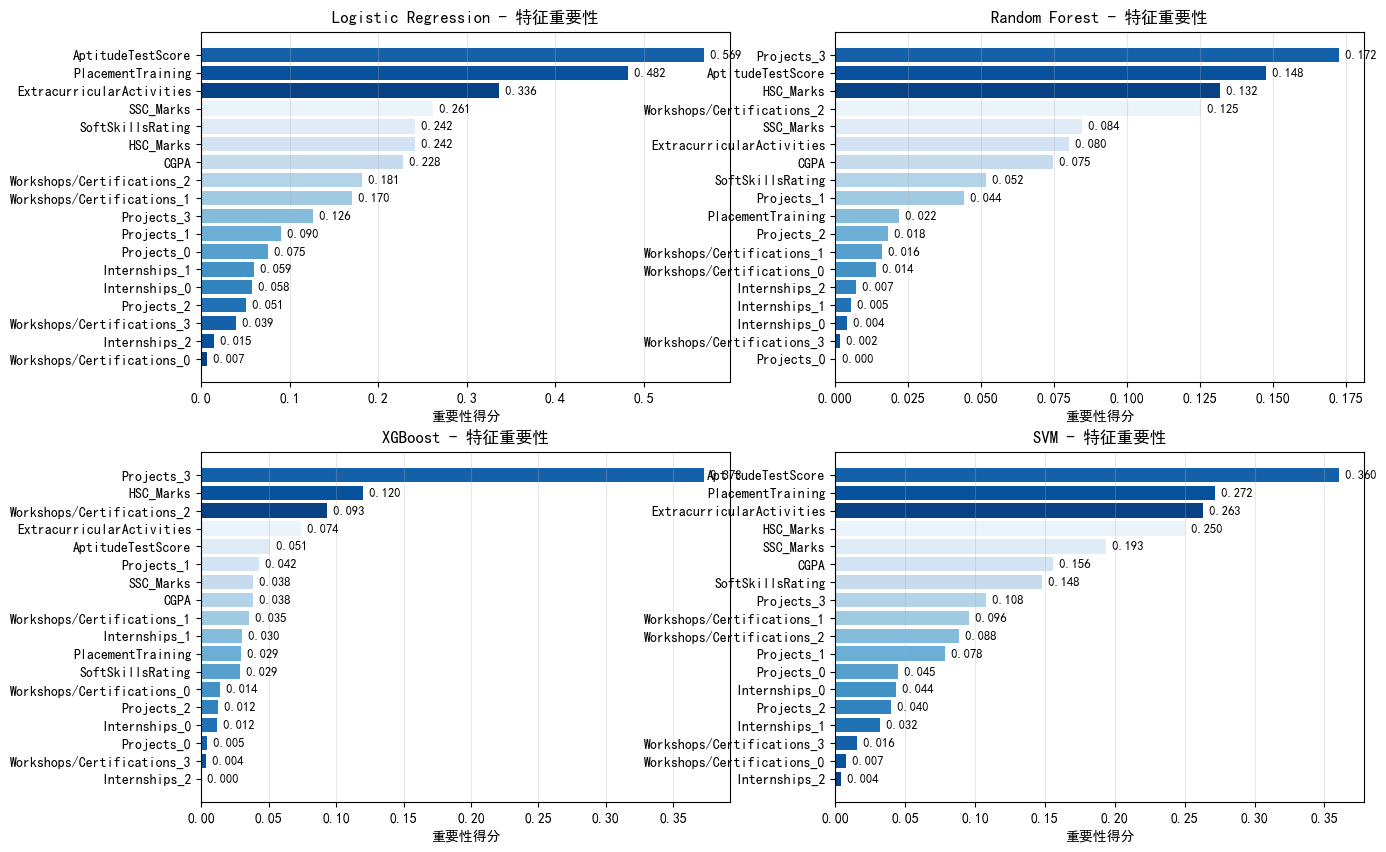

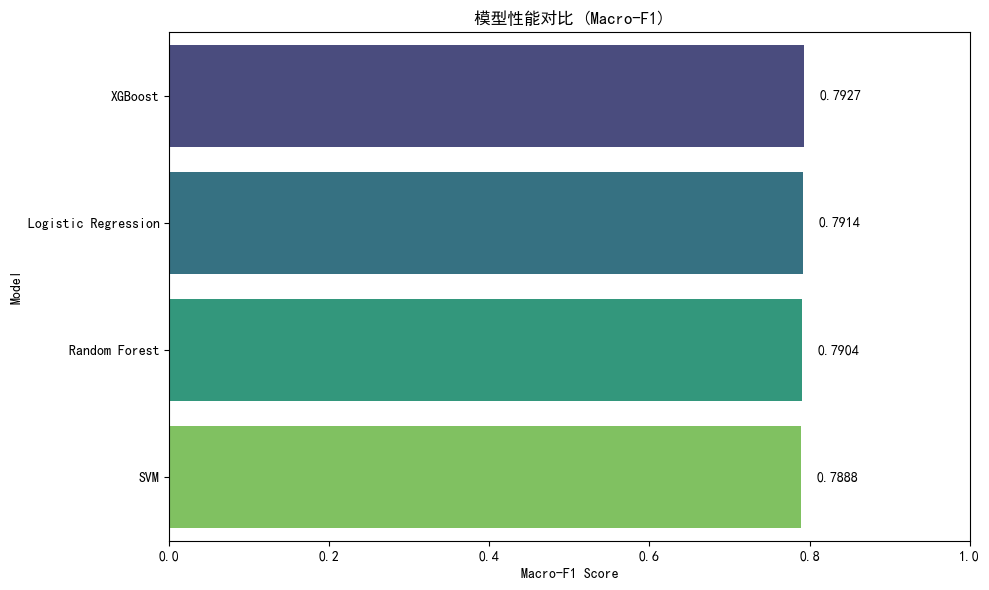


最佳模型: XGBoost (Macro-F1: 0.7927)


In [4]:
# 1. 数据加载
df = pd.read_csv("train_new.csv")
X_train = df.drop(columns=['label'])  # 移除无关列
y_train = df['label']

# 2. 检查类别平衡
print("训练集类别比例:\n", y_train.value_counts(normalize=True))

# 3. 若需要标准化，数值特征列表
continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# 4. 定义模型和参数网格
os.makedirs('saved_models', exist_ok=True)
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'model__C': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1, 10],  # 注意维度
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': [20, 30, 50, 100, 150, 200, 300],
            'model__max_depth': [None, 5, 7, 10, 12],  # 注意维度
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": False
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        "params": {
            'model__learning_rate': [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
            'model__max_depth': [3, 5, 7, 10],
            'model__scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]
        },
        "needs_scaling": False
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'model__C': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    }
}

# 5. 交叉验证设置
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5 fold
scorer = make_scorer(f1_score, average='macro')

# 6. 模型训练与评估
results = []
feature_importances = {}
plt.figure(figsize=(15, 10))
plt_idx = 1  # 用于子图位置索引

for model_name, model_info in models.items():
    print(f"\n=== 正在训练 {model_name} ===")
    
    # 创建Pipeline（标准化 + 过采样 + 模型）
    steps = []
    if model_info["needs_scaling"]:
        steps.append(('scaler', StandardScaler()))
    steps.extend([
        ('smote', SMOTE(random_state=42)),
        ('model', model_info["model"])
    ])
    # steps.extend([
    #     ('model', model_info["model"])
    # ])
    pipeline = Pipeline(steps)
    
    # 网格搜索
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info["params"],
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    # 存储最佳模型
    best_model = grid.best_estimator_
    model_filename = f"saved_models/{model_name.replace(' ', '_')}.joblib"
    dump(best_model, model_filename)
    print(f"模型已保存为: {model_filename}")
    
    # 交叉验证结果
    cv_results = grid.cv_results_
    best_score = grid.best_score_
    print(f"最佳参数: {grid.best_params_}")
    print(f"平均Macro-F1: {best_score:.4f}")
    
    # 记录结果
    results.append({
        'Model': model_name,
        'Macro-F1': best_score,
        'Best Params': grid.best_params_
    })
    
    # 特征重要性分析并可视化
    if hasattr(best_model.named_steps['model'], 'coef_'):
        importance = np.abs(best_model.named_steps['model'].coef_[0])
    elif hasattr(best_model.named_steps['model'], 'feature_importances_'):
        importance = best_model.named_steps['model'].feature_importances_
    else:
        importance = None
    
    if importance is not None:
        feat_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        
        feature_importances[model_name] = feat_importance
        
        # 打印表格
        print("\n特征重要性：")
        print(feat_importance.head(25).to_string(index=False))
        
        # 可视化 - 创建子图
        plt.subplot(2, 2, plt_idx)
        plt_idx += 1
        
        # 特征重要性
        top_features = feat_importance.head(25).sort_values('Importance', ascending=True)
        
        # 绘制水平条形图
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color=sns.color_palette("Blues_r", 15))
        
        plt.title(f'{model_name} - 特征重要性')
        plt.xlabel('重要性得分')
        plt.grid(axis='x', alpha=0.3)
        
        # 添加数值标签
        for i, v in enumerate(top_features['Importance']):
            plt.text(v, i, f" {v:.3f}", va='center', fontsize=9)
    
    else:
        print("该模型不提供特征重要性分析")

# 7. 结果对比可视化
results_df = pd.DataFrame(results).sort_values('Macro-F1', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')
plt.title('模型性能对比 (Macro-F1)')
plt.xlim(0, 1)
plt.xlabel('Macro-F1 Score')
plt.ylabel('Model')
for i, v in enumerate(results_df['Macro-F1']):
    plt.text(v + 0.02, i, f"{v:.4f}", color='black', va='center')
plt.tight_layout()
plt.show()

# 8. 输出最佳模型
best_model_name = results_df.iloc[0]['Model']
print(f"\n最佳模型: {best_model_name} (Macro-F1: {results_df.iloc[0]['Macro-F1']:.4f})")

### 扩大参数搜索范围：

训练集类别比例:
 label
0    0.586071
1    0.413929
Name: proportion, dtype: float64

=== 正在训练 Logistic Regression ===
Fitting 10 folds for each of 54 candidates, totalling 540 fits
模型已保存为: saved_models/Logistic_Regression.joblib
最佳参数: {'model__C': 0.3, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'sag'}
平均Macro-F1: 0.7901

特征重要性：
                   Feature  Importance
         AptitudeTestScore    0.568883
         PlacementTraining    0.481496
 ExtracurricularActivities    0.337029
                 SSC_Marks    0.261256
                 HSC_Marks    0.242412
          SoftSkillsRating    0.240794
                      CGPA    0.228709
Workshops/Certifications_2    0.181195
Workshops/Certifications_1    0.170116
                Projects_3    0.126231
                Projects_1    0.089946
                Projects_0    0.075469
             Internships_1    0.059305
             Internships_0    0.057535
                Projects_2    0.050881
Workshops/Certifications_3

C:\Users\Ray\AppData\Local\Temp\ipykernel_21788\3960393854.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')


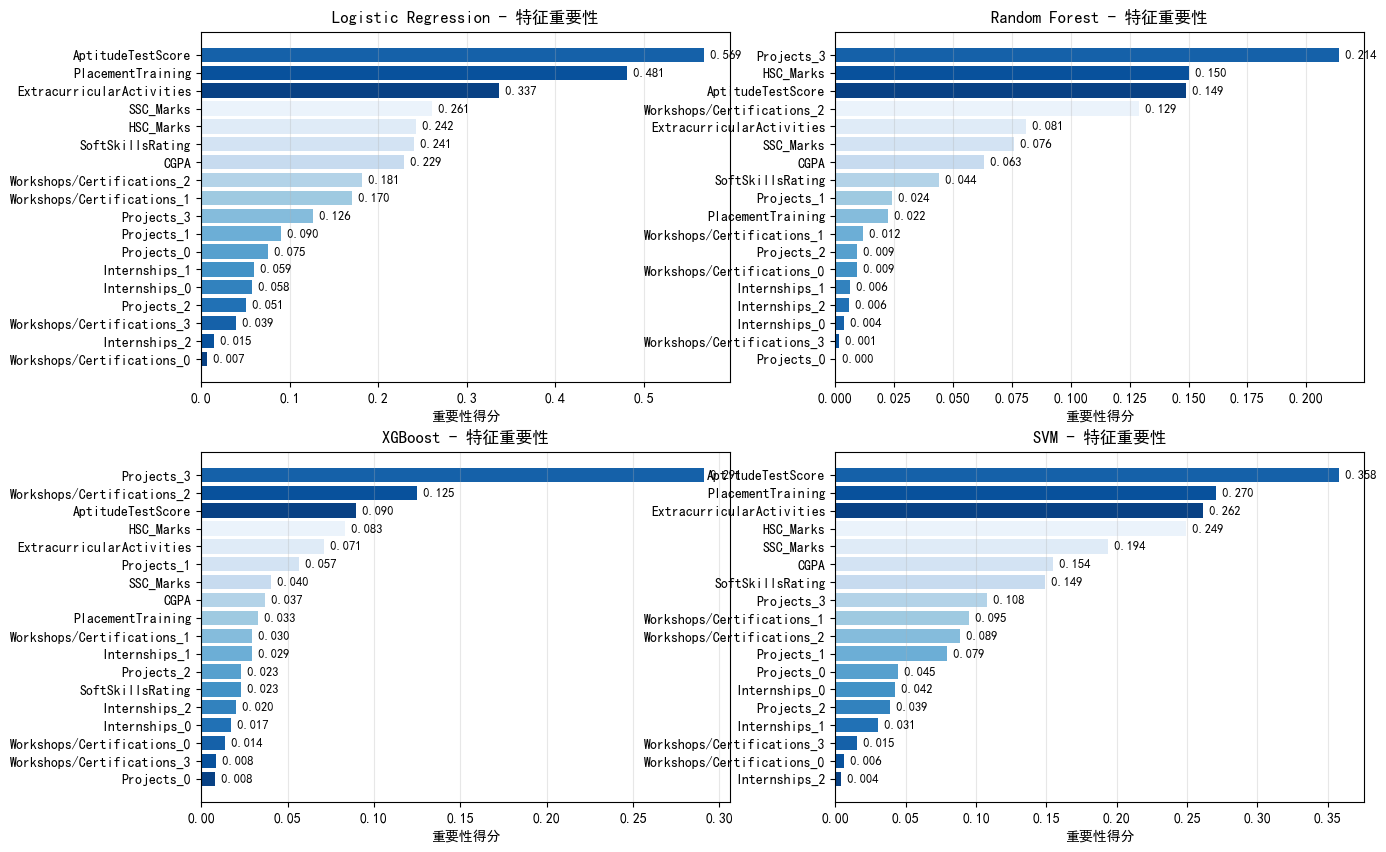

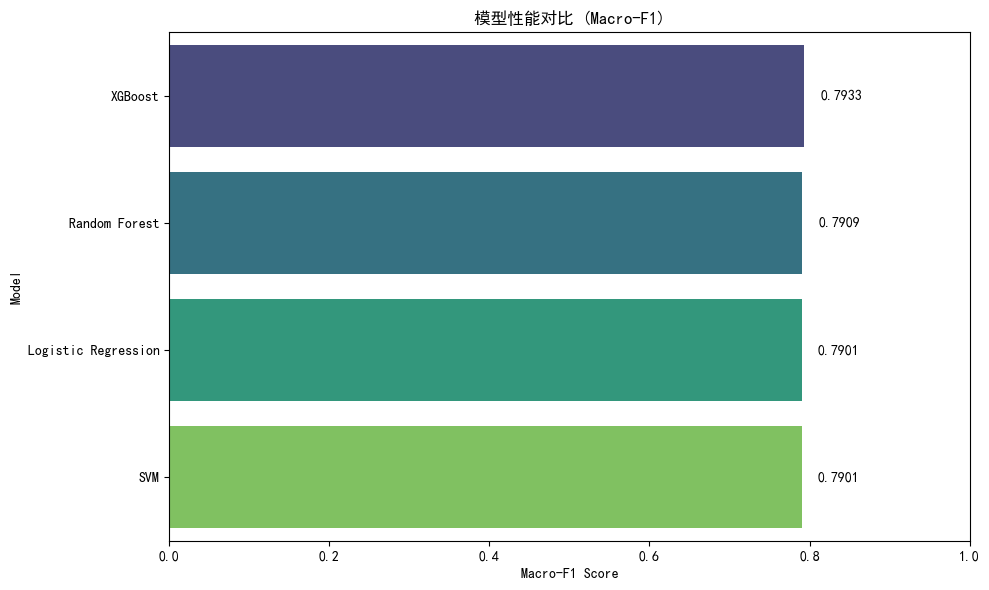


最佳模型: XGBoost (Macro-F1: 0.7933)


In [2]:
# 1. 数据加载
df = pd.read_csv("train_new.csv")
X_train = df.drop(columns=['label'])  # 移除无关列
y_train = df['label']

# 2. 检查类别平衡
print("训练集类别比例:\n", y_train.value_counts(normalize=True))

# 3. 若需要标准化，数值特征列表
continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# 4. 定义模型和参数网格
os.makedirs('saved_models', exist_ok=True)
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 10],  # 注意维度
            'model__penalty': ['l2'], # newly added
            'model__solver': ['lbfgs', 'newton-cg', 'sag'], # newly added
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': [20, 30, 50, 100, 150, 200, 300],
            'model__max_depth': [None, 5, 7, 10, 15, 20],  # 注意维度
            'model__max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],  # newly added
            'model__class_weight': [None, 'balanced']  # newly added
        },
        "needs_scaling": False
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        # "model": XGBClassifier(eval_metric='logloss', n_estimators=1000, early_stopping_rounds=50),
        "params": {
            'model__learning_rate': [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
            'model__max_depth': [3, 5, 7, 10],
            'model__subsample': [0.7, 0.8, 1.0],         # newly added
            'model__colsample_bytree': [0.7, 0.8, 1.0],  # newly added
            'model__scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]
        },
        "needs_scaling": False
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'model__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    }
}

# 5. 交叉验证设置
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# 6. 模型训练与评估
results = []
feature_importances = {}
plt.figure(figsize=(15, 10))
plt_idx = 1  # 用于子图位置索引

for model_name, model_info in models.items():
    print(f"\n=== 正在训练 {model_name} ===")
    
    # 创建Pipeline（标准化 + 过采样 + 模型）
    steps = []
    if model_info["needs_scaling"]:
        steps.append(('scaler', StandardScaler()))
    steps.extend([
        ('smote', SMOTE(random_state=42)),
        ('model', model_info["model"])
    ])
    # steps.extend([
    #     ('model', model_info["model"])
    # ])
    pipeline = Pipeline(steps)
    
    # 网格搜索
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info["params"],
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    # 存储最佳模型
    best_model = grid.best_estimator_
    model_filename = f"saved_models/{model_name.replace(' ', '_')}.joblib"
    dump(best_model, model_filename)
    print(f"模型已保存为: {model_filename}")
    
    # 交叉验证结果
    cv_results = grid.cv_results_
    best_score = grid.best_score_
    print(f"最佳参数: {grid.best_params_}")
    print(f"平均Macro-F1: {best_score:.4f}")
    
    # 记录结果
    results.append({
        'Model': model_name,
        'Macro-F1': best_score,
        'Best Params': grid.best_params_
    })
    
    # 特征重要性分析并可视化
    if hasattr(best_model.named_steps['model'], 'coef_'):
        importance = np.abs(best_model.named_steps['model'].coef_[0])
    elif hasattr(best_model.named_steps['model'], 'feature_importances_'):
        importance = best_model.named_steps['model'].feature_importances_
    else:
        importance = None
    
    if importance is not None:
        feat_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        
        feature_importances[model_name] = feat_importance
        
        # 打印表格
        print("\n特征重要性：")
        print(feat_importance.head(25).to_string(index=False))
        
        # 可视化 - 创建子图
        plt.subplot(2, 2, plt_idx)
        plt_idx += 1
        
        # 特征重要性
        top_features = feat_importance.head(25).sort_values('Importance', ascending=True)
        
        # 绘制水平条形图
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color=sns.color_palette("Blues_r", 15))
        
        plt.title(f'{model_name} - 特征重要性')
        plt.xlabel('重要性得分')
        plt.grid(axis='x', alpha=0.3)
        
        # 添加数值标签
        for i, v in enumerate(top_features['Importance']):
            plt.text(v, i, f" {v:.3f}", va='center', fontsize=9)
    
    else:
        print("该模型不提供特征重要性分析")

# 7. 结果对比可视化
results_df = pd.DataFrame(results).sort_values('Macro-F1', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')
plt.title('模型性能对比 (Macro-F1)')
plt.xlim(0, 1)
plt.xlabel('Macro-F1 Score')
plt.ylabel('Model')
for i, v in enumerate(results_df['Macro-F1']):
    plt.text(v + 0.02, i, f"{v:.4f}", color='black', va='center')
plt.tight_layout()
plt.show()

# 8. 输出最佳模型
best_model_name = results_df.iloc[0]['Model']
print(f"\n最佳模型: {best_model_name} (Macro-F1: {results_df.iloc[0]['Macro-F1']:.4f})")

### 扩大调参范围，改变搜索方式为random search：

训练集类别比例:
 label
0    0.586071
1    0.413929
Name: proportion, dtype: float64

=== 正在训练 Logistic_Regression ===
Fitting 5 folds for each of 50 candidates, totalling 250 fits
模型已保存为: saved_models/Logistic_Regression.joblib
最佳参数: {'model__C': 0.9643857615941438, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.22479561626896213, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
平均Macro-F1: 0.7914

特征贡献度:

特征重要性：
                   Feature  Importance
         AptitudeTestScore    0.570678
         PlacementTraining    0.482585
 ExtracurricularActivities    0.337471
                 SSC_Marks    0.261372
                 HSC_Marks    0.242212
          SoftSkillsRating    0.240794
                      CGPA    0.228728
Workshops/Certifications_2    0.187578
                Projects_3    0.182589
Workshops/Certifications_1    0.164117
                Projects_0    0.081320
             Internships_1    0.076138
             Internships_0    0.043903
Workshops/Certifications_3 

C:\Users\Ray\AppData\Local\Temp\ipykernel_6276\3581423899.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')


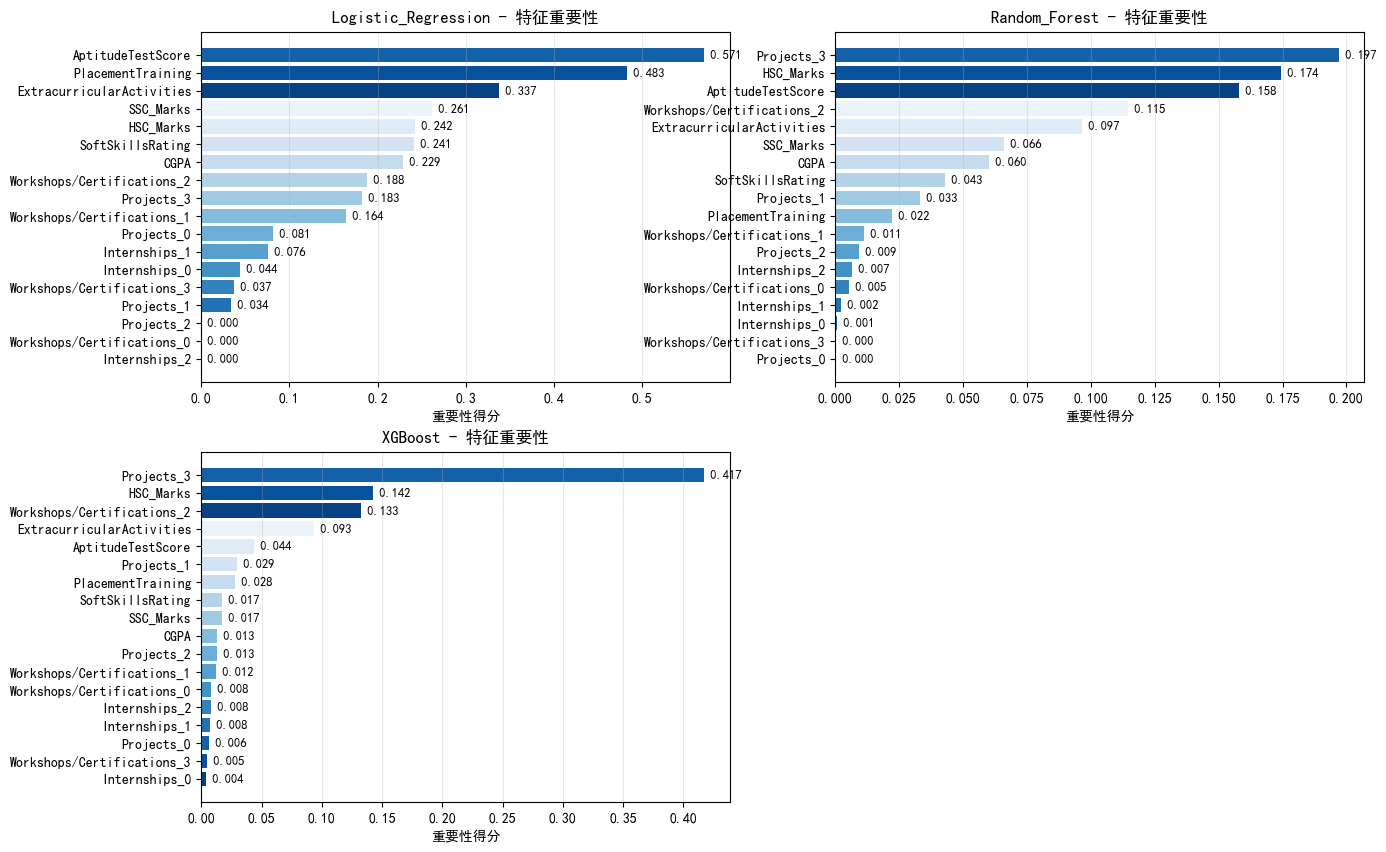

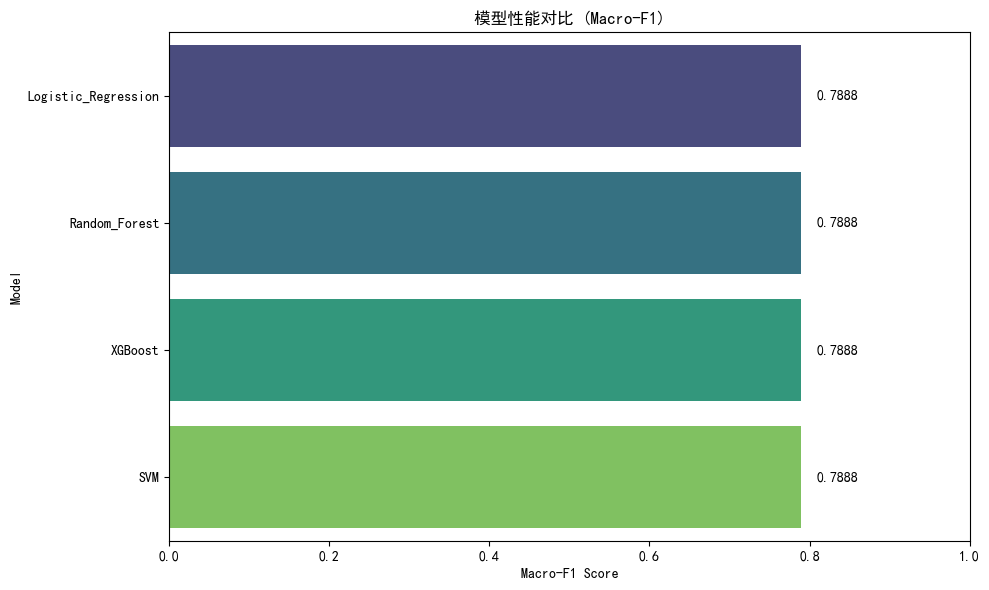


最佳模型: Logistic_Regression (Macro-F1: 0.7888)


In [43]:
# 1. 数据加载
df = pd.read_csv("train_new.csv")
X_train = df.drop(columns=['label'])  # 移除无关列
y_train = df['label']

# 2. 检查类别平衡
print("训练集类别比例:\n", y_train.value_counts(normalize=True))

# 3. 若需要标准化，数值特征列表
continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# 4. 定义模型和参数网格
os.makedirs('saved_models', exist_ok=True)
# 修改为随机搜索的参数分布
models = {
    "Logistic_Regression": {
        "model": LogisticRegression(max_iter=5000),
        "params": {
            'model__C': loguniform(1e-3, 100),  # 对数均匀分布替代固定值
            'model__penalty': ['l1', 'l2', 'elasticnet'],
            'model__solver': ['saga'],
            'model__l1_ratio': uniform(0.1, 0.8),  # 0.1~0.9连续均匀采样
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True,
        "n_iter": 50  # 该模型的随机采样次数
    },
    "Random_Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': randint(50, 301),  # 50-300随机整数
            'model__max_depth': [None] + list(range(5, 21, 5)),
            'model__min_samples_split': randint(2, 11),  # 2-10
            'model__min_samples_leaf': randint(1, 5),  # 1-4
            'model__max_features': ['sqrt', 'log2', 0.3, 0.5],
            'model__bootstrap': [True, False],
            'model__class_weight': [None, 'balanced', 'balanced_subsample']
        },
        "needs_scaling": False,
        "n_iter": 30
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', n_estimators=1000), 
        # "model": XGBClassifier(eval_metric='logloss', n_estimators=1000, early_stopping_rounds=50), 
        "params": {
            'model__learning_rate': loguniform(1e-3, 0.3),
            'model__max_depth': randint(3, 10),  # 3-9
            'model__min_child_weight': randint(1, 6),  # 1-5
            'model__gamma': uniform(0, 0.3),  # 0-0.3
            'model__subsample': uniform(0.6, 0.4),  # 0.6-1.0
            'model__colsample_bytree': uniform(0.6, 0.4),  # 0.6-1.0
            'model__reg_alpha': loguniform(1e-3, 10),
            'model__reg_lambda': loguniform(1e-3, 10),
            'model__scale_pos_weight': [
                1, 
                (len(y_train) - sum(y_train)) / sum(y_train),
                (len(y_train) - sum(y_train)) / sum(y_train) * 1.5
            ]
        },
        "needs_scaling": False,
        "n_iter": 40
    }
}

# 6. 模型训练与评估
results = []
feature_importances = {}
plt.figure(figsize=(15, 10))
plt_idx = 1  # 用于子图位置索引

for model_name, model_info in models.items():
    print(f"\n=== 正在训练 {model_name} ===")
    
    # 创建Pipeline
    steps = []
    if model_info["needs_scaling"]:
        steps.append(('scaler', StandardScaler()))
    steps.extend([
        ('smote', SMOTE(random_state=42)),
        ('model', model_info["model"])
    ])
    # steps.extend([
    #     ('model', model_info["model"])
    # ])
    pipeline = Pipeline(steps)
    
    # 随机搜索
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model_info["params"],  # 注意改为param_distributions
        n_iter=model_info.get("n_iter", 25),  # 每个模型的采样次数
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    # 特殊处理XGBoost的早停
    # random_search.fit(X_train, y_train)
    if model_name == "XGBoost":
        X_train_xgb, X_val, y_train_xgb, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        random_search.fit(X_train_xgb, y_train_xgb, model__eval_set=[(X_val, y_val)], model__verbose=False)
    else:
        random_search.fit(X_train, y_train)
    
    # 存储最佳模型
    best_model = random_search.best_estimator_
    model_filename = f"saved_models/{model_name.replace(' ', '_')}.joblib"
    dump(best_model, model_filename)
    print(f"模型已保存为: {model_filename}")
    
    # 交叉验证结果
    print(f"最佳参数: {random_search.best_params_}")
    print(f"平均Macro-F1: {random_search.best_score_:.4f}")
    
    # 记录结果
    results.append({
        'Model': model_name,
        'Macro-F1': best_score,
        'Best Params': random_search.best_params_
    })
    
    # 特征重要性分析并可视化
    if hasattr(best_model.named_steps['model'], 'coef_'):
        importance = np.abs(best_model.named_steps['model'].coef_[0])
    elif hasattr(best_model.named_steps['model'], 'feature_importances_'):
        importance = best_model.named_steps['model'].feature_importances_
    else:
        importance = None
    
    if importance is not None:
        feat_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        
        feature_importances[model_name] = feat_importance
        
        # 打印表格
        print("\n特征重要性：")
        print(feat_importance.head(25).to_string(index=False))
        
        # 可视化 - 创建子图
        plt.subplot(1, 3, plt_idx)
        plt_idx += 1
        
        # 特征重要性
        top_features = feat_importance.head(25).sort_values('Importance', ascending=True)
        
        # 绘制水平条形图
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color=sns.color_palette("Blues_r", 15))
        
        plt.title(f'{model_name} - 特征重要性')
        plt.xlabel('重要性得分')
        plt.grid(axis='x', alpha=0.3)
        
        # 添加数值标签
        for i, v in enumerate(top_features['Importance']):
            plt.text(v, i, f" {v:.3f}", va='center', fontsize=9)
    
    else:
        print("该模型不提供特征重要性分析")

# 7. 结果对比可视化
results_df = pd.DataFrame(results).sort_values('Macro-F1', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')
plt.title('模型性能对比 (Macro-F1)')
plt.xlim(0, 1)
plt.xlabel('Macro-F1 Score')
plt.ylabel('Model')
for i, v in enumerate(results_df['Macro-F1']):
    plt.text(v + 0.02, i, f"{v:.4f}", color='black', va='center')
plt.tight_layout()
plt.show()

# 8. 输出最佳模型
best_model_name = results_df.iloc[0]['Model']
print(f"\n最佳模型: {best_model_name} (Macro-F1: {results_df.iloc[0]['Macro-F1']:.4f})")

# Test Dataset Prediction and Result Saving

In [31]:
# 1. 数据加载
df = pd.read_csv("test.csv")

# 2. 文字属性数值化
#test = df.drop(['StudentID','Internships'], axis=1)
test = df.drop(['StudentID'], axis=1)
test['ExtracurricularActivities'] = test['ExtracurricularActivities'].apply(lambda x: 1 if x == 'Yes' else 0)
test['PlacementTraining'] = test['PlacementTraining'].apply(lambda x: 1 if x == 'Yes' else 0)
test[['ExtracurricularActivities', 'PlacementTraining']].head()

# 3.独热编码
# onehot_cols = ['Internships', 'Projects', 'Workshops/Certifications']
test, encoder = one_hot_encode_sklearn(test, onehot_cols)

In [33]:
# 4. 若需要标准化，数值特征列表
continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# 5.加载模型并预测
model = load('saved_models/Random_Forest.joblib')
#model = load('saved_models/XGBoost.joblib')
predictions = model.predict(test)

# 6.创建提交文件并保存为CSV
sample_solution = pd.DataFrame({
    'StudentID': df['StudentID'],  # 假设测试集包含StudentID列
    'label': predictions
})
sample_solution.to_csv('sample_solution.csv', index=False)
print("预测结果已保存为 sample_solution.csv")
print("文件内容示例：")
print(sample_solution.head())

预测结果已保存为 sample_solution.csv
文件内容示例：
   StudentID  label
0      10000      1
1      10001      1
2      10002      0
3      10003      1
4      10004      0


训练集类别比例:
 label
0    0.586071
1    0.413929
Name: proportion, dtype: float64

=== 正在训练 Logistic Regression ===
Fitting 5 folds for each of 6 candidates, totalling 30 fits
最佳参数: {'model__C': 0.1, 'model__class_weight': None}
平均Macro-F1: 0.7924

特征贡献度:

特征重要性：
                  Feature  Importance
        PlacementTraining    0.919567
ExtracurricularActivities    0.722171
        AptitudeTestScore    0.595041
                SSC_Marks    0.281762
                 Projects    0.257556
                HSC_Marks    0.246736
         SoftSkillsRating    0.244232
                     CGPA    0.240965
 Workshops/Certifications    0.152688
              Internships    0.004780

=== 正在训练 Random Forest ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
最佳参数: {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__n_estimators': 100}
平均Macro-F1: 0.7822

特征贡献度:

特征重要性：
                  Feature  Importance
                HSC_Marks    0.210601
        AptitudeTestScore    0

C:\Users\Ray\AppData\Local\Temp\ipykernel_6608\2414369995.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')


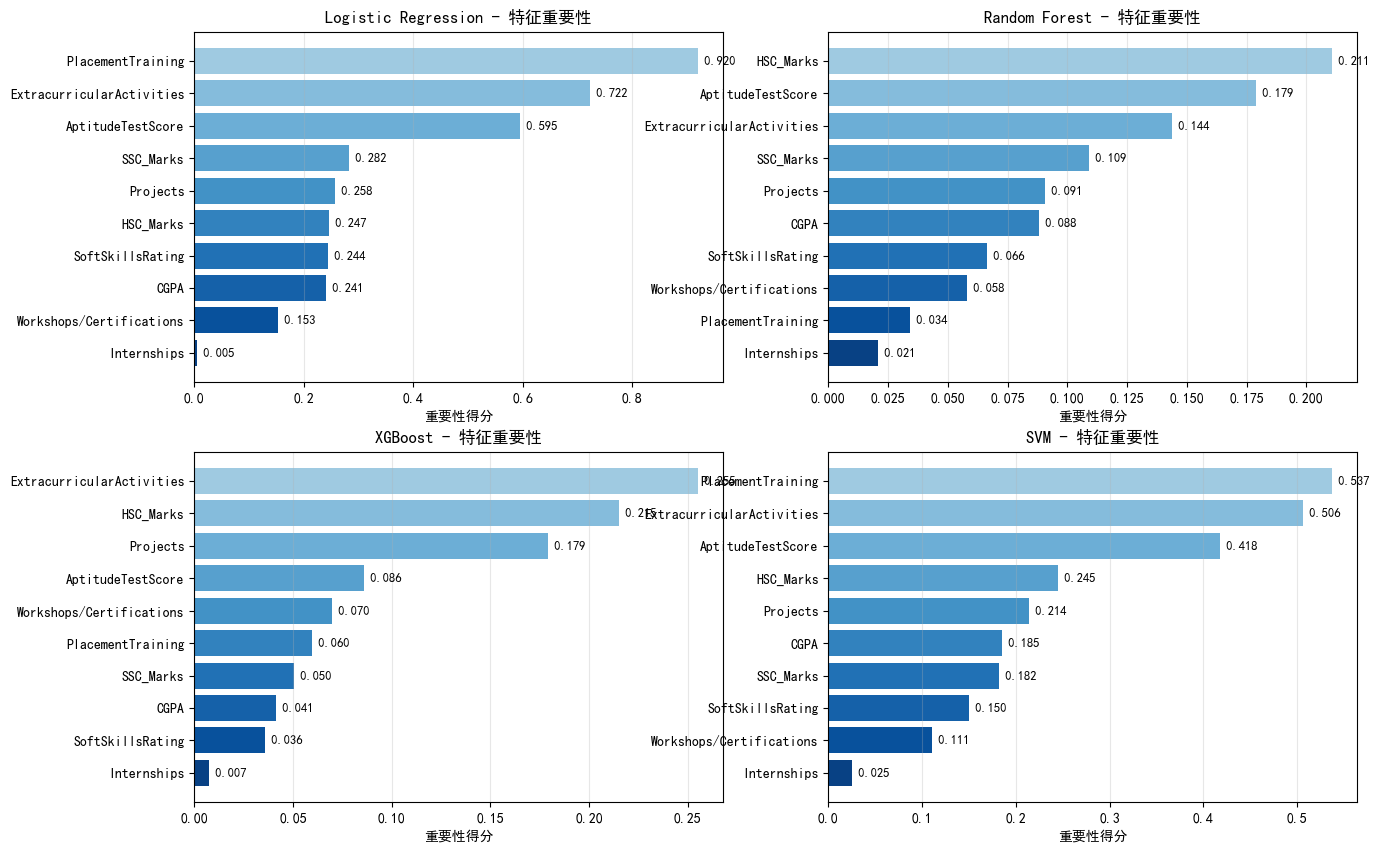

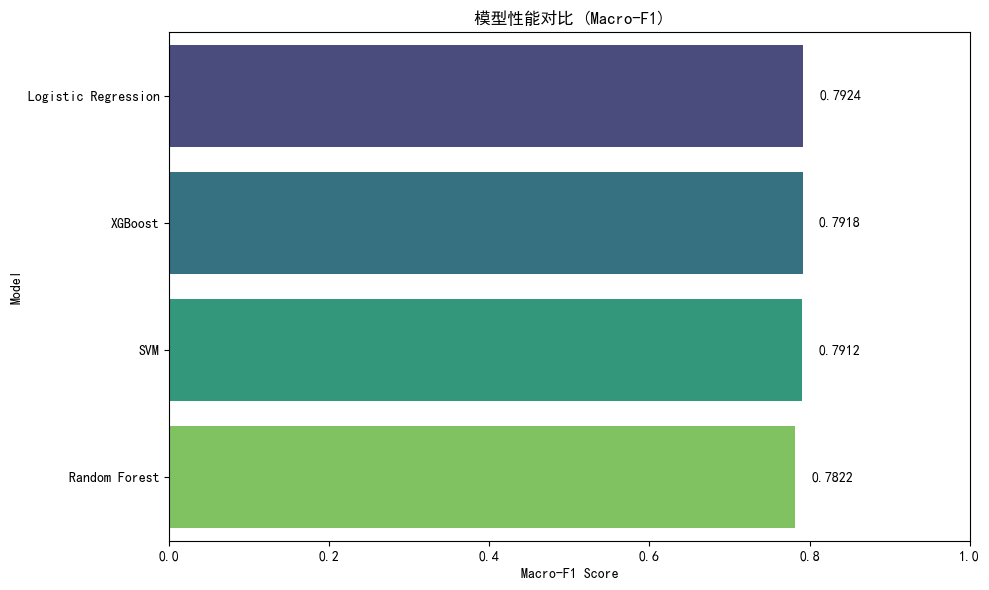


最佳模型: Logistic Regression (Macro-F1: 0.7924)


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 数据加载
df = pd.read_csv("train_new.csv")
X_train = df.drop(columns=['label'])  # 移除无关列
y_train = df['label']

# 2. 检查类别平衡
print("训练集类别比例:\n", y_train.value_counts(normalize=True))

# 3. 数值特征标准化
continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# 4. 定义模型和参数网格
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'model__C': [0.1, 1, 10],
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': [50, 100],
            'model__max_depth': [None, 10],
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": False
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        "params": {
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 6],
            'model__scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]
        },
        "needs_scaling": False
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    }
}

# 5. 交叉验证设置
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# 存储结果
results = []
feature_importances = {}
plt.figure(figsize=(15, 10))
plt_idx = 1  # 用于子图位置索引

# 6. 模型训练与评估
for model_name, model_info in models.items():
    print(f"\n=== 正在训练 {model_name} ===")
    
    # 创建pipeline
    steps = [('model', model_info["model"])]
    pipeline = Pipeline(steps)
    
    # 网格搜索
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info["params"],
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    # 存储最佳模型
    best_model = grid.best_estimator_
    
    # 交叉验证结果
    cv_results = grid.cv_results_
    best_score = grid.best_score_
    print(f"最佳参数: {grid.best_params_}")
    print(f"平均Macro-F1: {best_score:.4f}")
    
    # 记录结果
    results.append({
        'Model': model_name,
        'Macro-F1': best_score,
        'Best Params': grid.best_params_
    })
    
    # 特征重要性分析
    print("\n特征贡献度:")
    if hasattr(best_model.named_steps['model'], 'coef_'):
        importance = np.abs(best_model.named_steps['model'].coef_[0])
    elif hasattr(best_model.named_steps['model'], 'feature_importances_'):
        importance = best_model.named_steps['model'].feature_importances_
    else:
        importance = None
    
    if importance is not None:
        # feat_importance = pd.DataFrame({
        #     'Feature': X_train.columns,
        #     'Importance': importance
        # }).sort_values('Importance', ascending=False)
        
        # feature_importances[model_name] = feat_importance
        # pd.set_option('display.max_rows', None)
        # print(feat_importance)
        # pd.reset_option('display.max_rows')

        feat_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        
        feature_importances[model_name] = feat_importance
        
        # 打印表格
        print("\n特征重要性：")
        print(feat_importance.head(10).to_string(index=False))
        
        # 可视化 - 创建子图
        plt.subplot(2, 2, plt_idx)
        plt_idx += 1
        
        top_features = feat_importance.head(15).sort_values('Importance', ascending=True)
        
        # 绘制水平条形图
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color=sns.color_palette("Blues_r", 15))
        
        plt.title(f'{model_name} - 特征重要性')
        plt.xlabel('重要性得分')
        plt.grid(axis='x', alpha=0.3)
        
        # 添加数值标签
        for i, v in enumerate(top_features['Importance']):
            plt.text(v, i, f" {v:.3f}", va='center', fontsize=9)
    else:
        print("该模型不提供特征重要性分析")

# 7. 结果对比可视化
results_df = pd.DataFrame(results).sort_values('Macro-F1', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')
plt.title('模型性能对比 (Macro-F1)')
plt.xlim(0, 1)
plt.xlabel('Macro-F1 Score')
plt.ylabel('Model')
for i, v in enumerate(results_df['Macro-F1']):
    plt.text(v + 0.02, i, f"{v:.4f}", color='black', va='center')
plt.tight_layout()
plt.show()

# 8. 输出最佳模型
best_model_name = results_df.iloc[0]['Model']
print(f"\n最佳模型: {best_model_name} (Macro-F1: {results_df.iloc[0]['Macro-F1']:.4f})")